expt 1 - loading and merging dataset

In [ ]:

import pandas as pd
df1= pd.read_csv('/content/winequality-red.csv', delimiter=';')
df2= pd.read_csv('/content/winequality-red.csv',delimiter=';')
print("red wine data: ")
df1['type']='red'
print(df1.head())
print("white wine data: ")
df2['type']='white'
print(df2.head())
merged= pd.concat([df1,df2],ignore_index= True)


print("combined: ")
print(merged.head())

red wine data: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8      

expt 2 - cleaning

In [ ]:
import pandas as pd
df=pd.read_csv('/content/data-01')
#data cleaning:
print("checking for null values(is null)")
df1.isnull()
print("checking for null values(not null)")
df1.notnull()
print("checking for duplicated values: ")
df1.duplicated()
print("after dropping duplicated values: ")
df.drop_duplicates()

FileNotFoundError: [Errno 2] No such file or directory: '/content/data-01'

expt 3 - encoding

In [ ]:
#1. label encoding
from sklearn.preprocessing import LabelEncoder
data=['Hot','Cold','Warm','Hot','Warm']
encoder= LabelEncoder()
encoded_data= encoder.fit_transform(data)
print(f"Label encoded data: {encoded_data}")
#2. one hot encoding
import pandas as pd
data=['Red','Pink','Yellow','Pink','Red']
df= pd.DataFrame(data,columns=['Color'])
one_hot_encoded=pd.get_dummies(df['Color'])
print("one hot encoded: \n")
print(one_hot_encoded)
#3. ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
data=[['Low'],['High'],['Medium'],['High'],['Medium']]
encoder= OrdinalEncoder(categories=[['Low','Medium','High']])
encoded_data=encoder.fit_transform(data)
print(f"Ordinal Encoded Data: {encoded_data}")
#4. Target encoding
!pip install category_encoders
import pandas as pd
import category_encoders as ce
data= {'Color':['Red','Blue','Green','Blue','Red','Blue','Green','Green','Green','Blue'],'Target':['1','0','0','1','1','1','0','1','0','1']}
df=pd.DataFrame(data)
df['Target'] = df['Target'].astype(int)
encoder= ce.TargetEncoder(cols=['Color'])
encoded_data= encoder.fit_transform(df['Color'],df['Target'])
print(f"Target encoded: {encoded_data}")
#5. binary encoding
import category_encoders as ce
data=['Red','Green','Blue','Red','Grey']
encoder = ce.BinaryEncoder(cols=['Color'])
encoded_data= encoder.fit_transform(pd.DataFrame(data,columns=['Color']))
print("binary encoded: \n")
print(encoded_data)
#6. frequency encoding
import pandas as pd
data=['Red','Green','Blue','Red','Red']
series_data= pd.Series(data)
frequency_encoding= series_data.value_counts()
encoded_data= [frequency_encoding[x] for x in data]
print("frequency encoded: \n")
print("encoded data: ",encoded_data)

Label encoded data: [1 0 2 1 2]
one hot encoded: 

    Pink    Red  Yellow
0  False   True   False
1   True  False   False
2  False  False    True
3   True  False   False
4  False   True   False
Ordinal Encoded Data: [[0.]
 [2.]
 [1.]
 [2.]
 [1.]]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.1 MB/s eta 0:00:00
Target encoded:       Color
0  0.656740
1  0.625197
2  0.541206
3  0.625197
4  0.656740
5  0.625197
6  0.541206
7  0.541206
8  0.541206
9  0.625197
binary encoded: 

   Color_0  Color_1  Color_2
0        0        0        1
1        0        1        0
2        0        1        1
3        0        0        1
4        1        0        0
frequency encoded: 

encoded data:  [np.int64(3), np.int64(1), np.int64(1), np.int64(3), np.int64(3)]


expt 4 - min-max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data= np.array([[60],[70],[80],[90],[100]])
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
print(scaled_data)

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


expt 5 - visualization techniques

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv(r"/content/dataset expt 5.csv")

# Display the first 200 rows of the dataset
df.head(200)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,Male,0,1,Moderate,30.60,1,1,215.4,91,118,0,Low,Asymptomatic,Reversible defect,1,Left Ventricular Hypertrophy,0,120,Low
196,57,Male,0,0,Moderate,26.82,0,0,188.8,149,67,0,Moderate,Asymptomatic,Reversible defect,0,Normal,0,119,Low
197,56,Female,0,0,Moderate,24.38,1,0,180.3,152,122,0,Low,Asymptomatic,Normal,0,Normal,0,121,Low
198,18,Male,1,0,Moderate,25.85,0,1,154.5,104,76,0,Low,Atypical,Fixed defect,1,Normal,0,132,Low


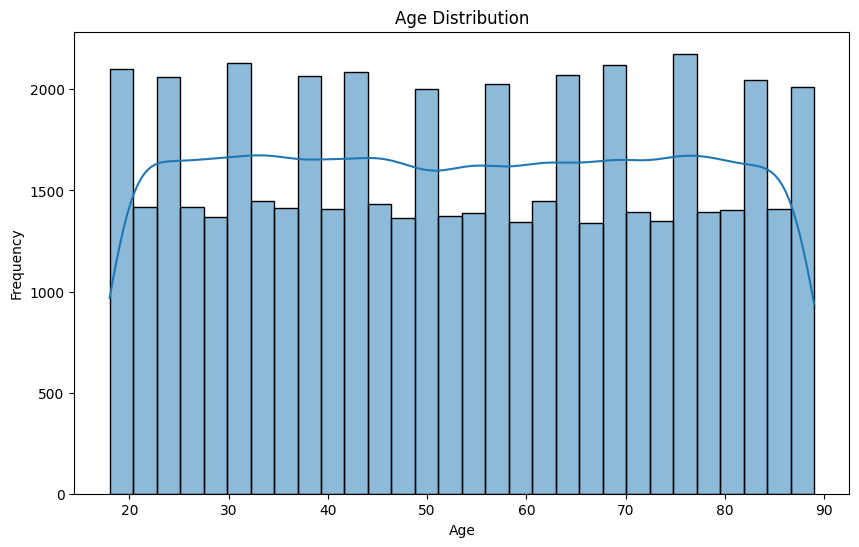

In [ ]:
# Plot 1: Histogram of Age with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

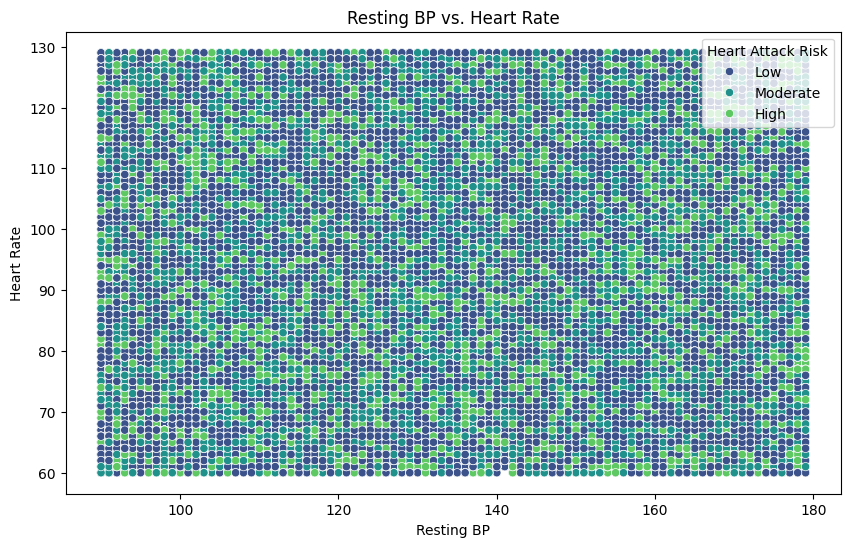

In [ ]:
# Plot 2: Scatterplot of Resting_BP vs. Heart_Rate, colored by Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Resting_BP", y="Heart_Rate", hue="Heart_Attack_Risk", palette='viridis')
plt.title('Resting BP vs. Heart Rate')
plt.xlabel('Resting BP')
plt.ylabel('Heart Rate')
plt.legend(title="Heart Attack Risk")
plt.show()

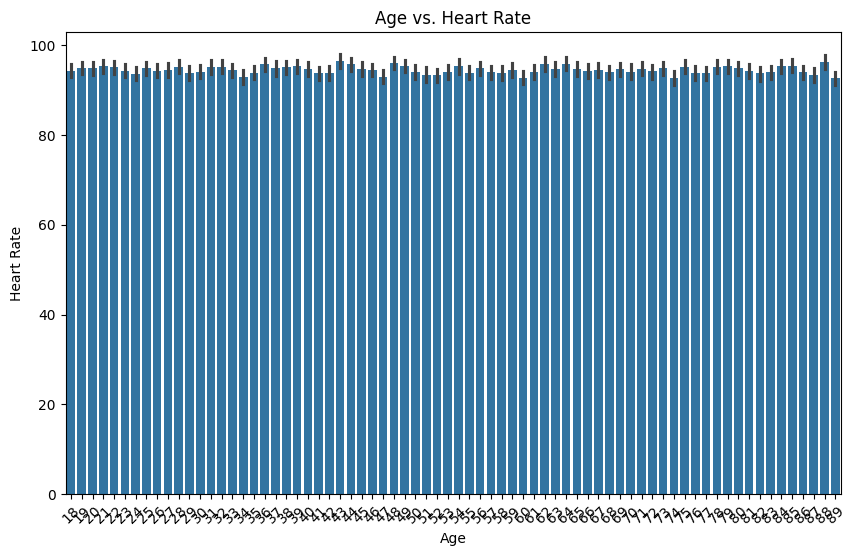

In [ ]:
# Plot 3: Bar plot of Age vs. Heart Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y="Heart_Rate", data=df)  # ci=None to avoid confidence intervals
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

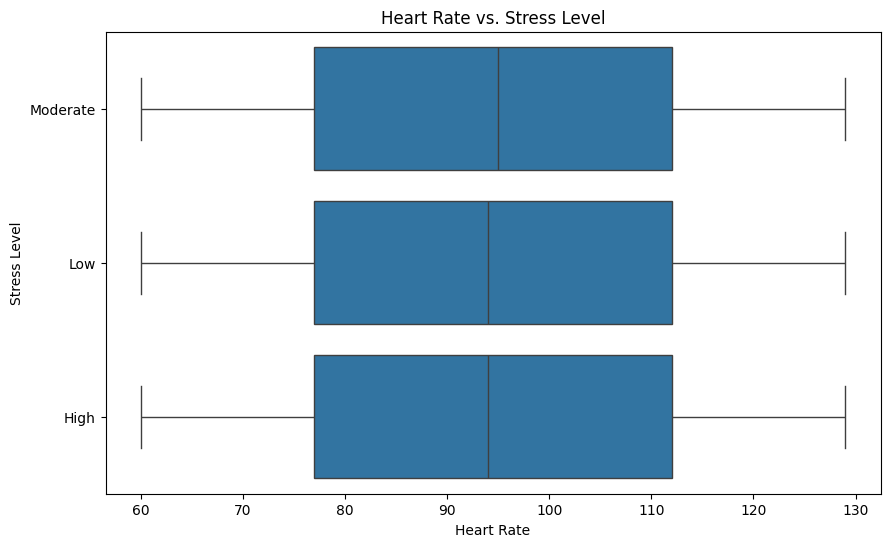

In [ ]:
# Plot 4: Box plot of Heart Rate vs. Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart_Rate', y="Stress_Level", data=df)
plt.title('Heart Rate vs. Stress Level')
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.show()

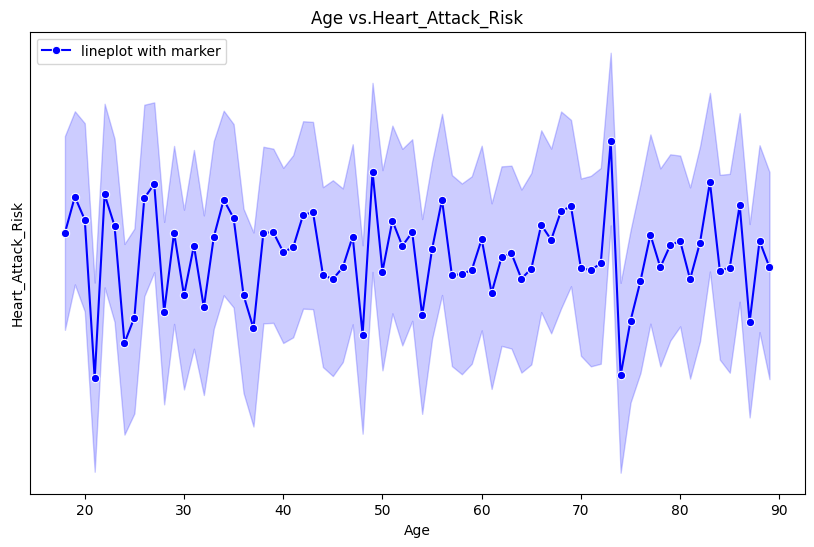

In [ ]:
# Plot 5: line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Age",y="Heart_Attack_Risk", label="lineplot with marker", color="blue", marker="o" )
plt.title('Age vs.Heart_Attack_Risk')
plt.xlabel('Age')
plt.ylabel('Heart_Attack_Risk')
plt.show()
# Count the occurrences of each unique value in the 'Heart_Attack_Risk' column
risk_counts = df['Heart_Attack_Risk'].value_counts()

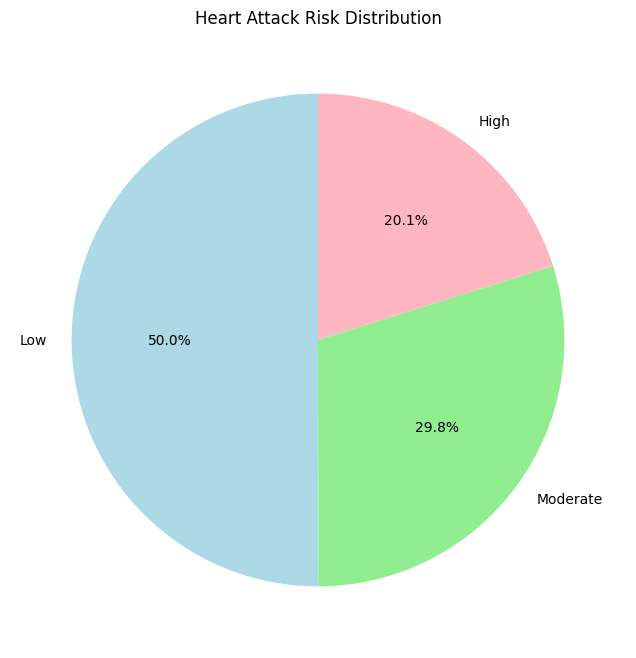

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen','lightpink'])
plt.title('Heart Attack Risk Distribution')
plt.show()

Expt 7 & 8

In [1]:
from google.colab import files
uploaded=files.upload()

Saving iris.data.csv to iris.data.csv


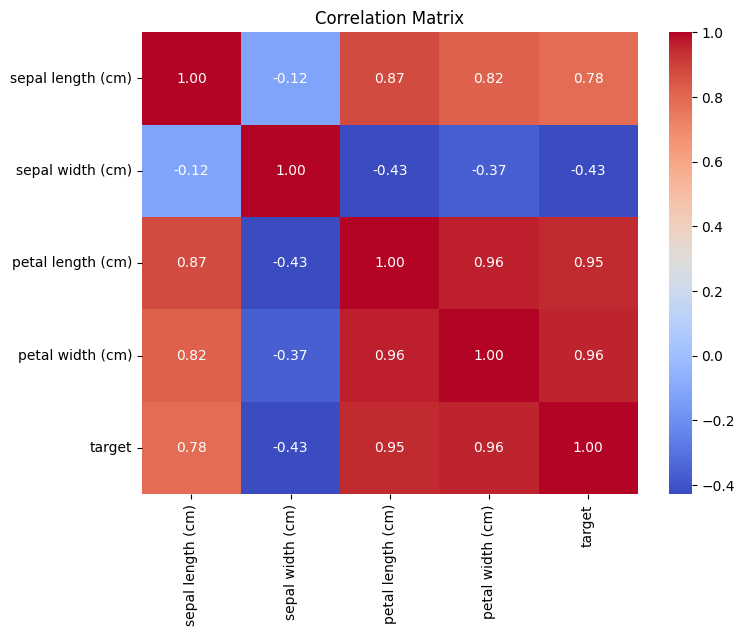

Features to drop based on correlation: ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
Selected features using Chi-Square: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')
Selected features using ANOVA: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset from sklearn
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = pd.DataFrame(data=iris.target, columns=["target"])

# Combine the features and target into a single DataFrame
df = pd.concat([data, target], axis=1)

# Step 2: Apply Filter Feature Selection Techniques

## Correlation Matrix (removing highly correlated features)
corr_matrix = df.corr()

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Drop features with high correlation (e.g., threshold of 0.9)
# Since features in the Iris dataset aren't highly correlated, no features will be dropped here
threshold = 0.9
drop_columns = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > threshold) and column != corr_matrix.columns[0]]
print(f"Features to drop based on correlation: {drop_columns}")
df_cleaned_corr = df.drop(columns=drop_columns)

## Chi-Square Test (for categorical features)
# Note: The chi-square test is typically used for categorical data, so let's ensure that the features are non-negative
X_chi2 = df.iloc[:, :-1]  # Features
y_chi2 = df.iloc[:, -1]   # Target

# Ensure all values are positive (for chi-square test)
X_chi2 = X_chi2.apply(lambda x: x - min(x) + 1)

chi2_selector = SelectKBest(chi2, k=2)  # Select top 2 features
X_chi2_selected = chi2_selector.fit_transform(X_chi2, y_chi2)

selected_chi2_features = X_chi2.columns[chi2_selector.get_support()]
print("Selected features using Chi-Square:", selected_chi2_features)

## ANOVA (F-test) for feature selection
anova_selector = SelectKBest(f_classif, k=2)  # Select top 2 features
X_anova_selected = anova_selector.fit_transform(X_chi2, y_chi2)

selected_anova_features = X_chi2.columns[anova_selector.get_support()]
print("Selected features using ANOVA:", selected_anova_features)